<a href="https://colab.research.google.com/github/alanjones2/Alan-Jones-article-code/blob/master/images/5vizlibs/5vizlibs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 5 Data Visualization Libraries for Python

# Get Gapminder Data

In [65]:
popDataURL = "https://raw.githubusercontent.com/jennybc/gapminder/master/inst/extdata/gapminder.tsv"

In [66]:
import pandas as pd

In [67]:
popData = pd.read_csv(popDataURL, delimiter='\t') 

In [68]:
popData['pop']=popData['pop']/1000000
popData

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8.425333,779.445314
1,Afghanistan,Asia,1957,30.332,9.240934,820.853030
2,Afghanistan,Asia,1962,31.997,10.267083,853.100710
3,Afghanistan,Asia,1967,34.020,11.537966,836.197138
4,Afghanistan,Asia,1972,36.088,13.079460,739.981106
...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9.216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10.704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11.404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11.926563,672.038623


In [69]:
SpainData = popData[popData['country']=='Spain']
UKData = popData[popData['country']=='United Kingdom']
IndiaData = popData[popData['country']=='India']
USData = popData[popData['country']=='United States']

# Matplotlib

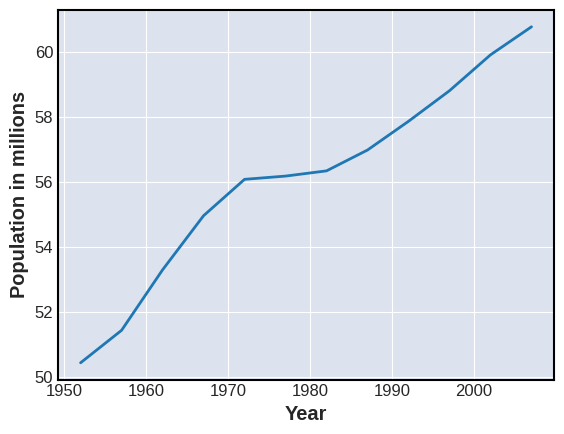

In [70]:
import matplotlib.pyplot as plt
plt.plot(UKData['year'],UKData['pop'])
plt.ylabel('Population in millions')
plt.xlabel('Year')
plt.show()

# Pandas Plot

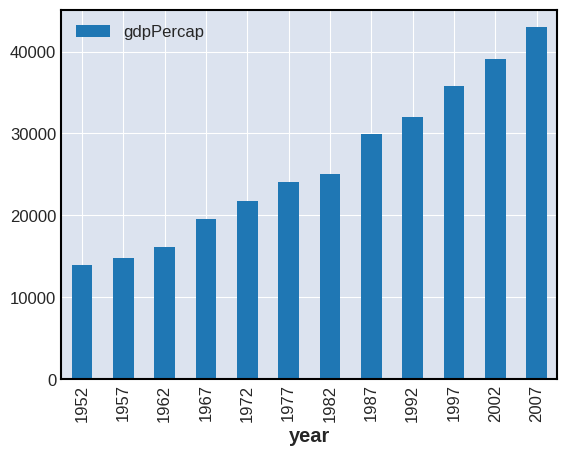

In [71]:
 
USData.plot.bar(x='year',y='gdpPercap')
plt.savefig("pandas1.png")

# Seaborn

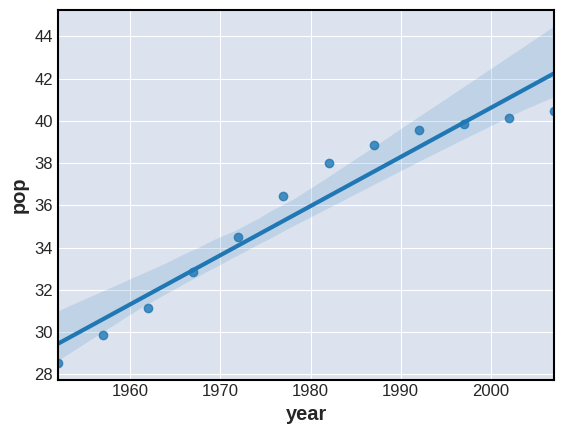

In [72]:
import seaborn as sns
sns.regplot(x="year", y="pop", data=SpainData)
plt.savefig("seaborn1.png")

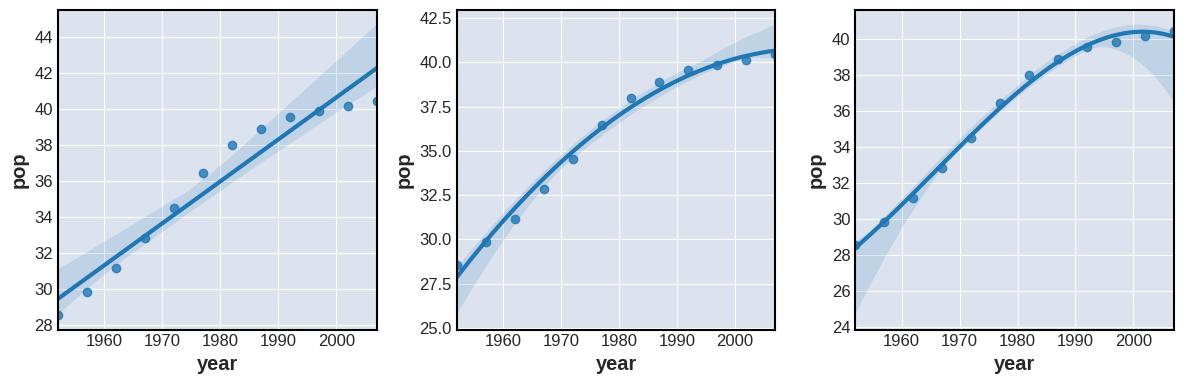

In [73]:
f = plt.figure(figsize=(12, 4))

gs = f.add_gridspec(1, 3)

ax = f.add_subplot(gs[0, 0])
sns.regplot(x="year", y="pop", data=SpainData,order=1)

ax = f.add_subplot(gs[0, 1])
sns.regplot(x="year", y="pop", data=SpainData,order=2)

ax = f.add_subplot(gs[0, 2])
sns.regplot(x="year", y="pop", data=SpainData,order=3)

f.tight_layout()

plt.savefig("seaborn1.png")


# Plotnine (ggplot)

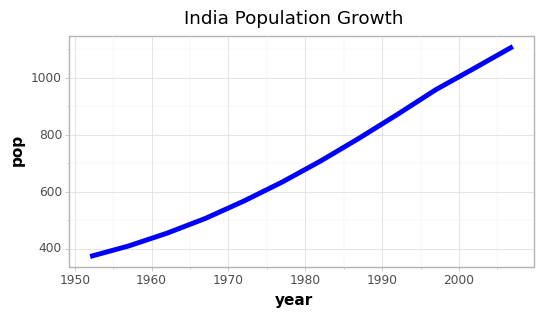

<ggplot: (8749221558509)>

In [74]:
from plotnine import *
(ggplot(IndiaData,aes('year','pop'))
 + geom_line(color='Blue',size=2)
 + theme_light()
 + theme(figure_size=(6,3))
 + ggtitle('India Population Growth')
)

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


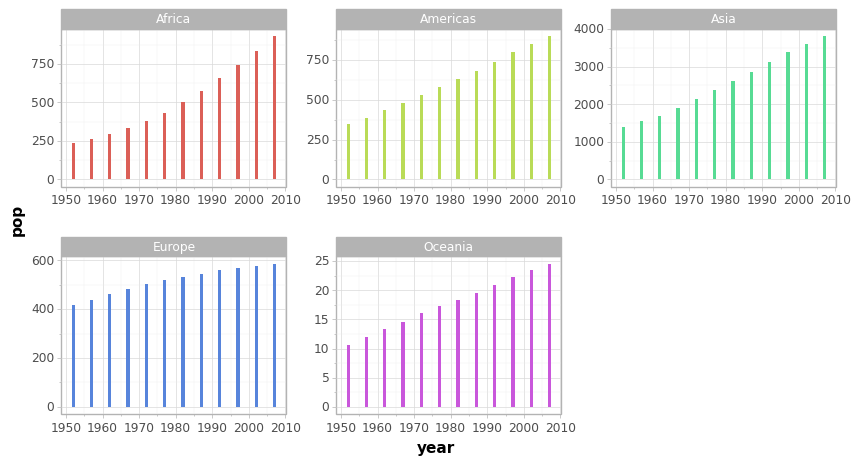

<ggplot: (8749221784553)>

In [75]:
(ggplot(popData, aes('year','pop', fill='continent'))
 + geom_col(show_legend=False)
 + facet_wrap('continent', scales='free')
 + theme_light()
 + theme(panel_spacing=0.5, figure_size=(10,5))
)

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if pdtypes.is_categorical(arr):


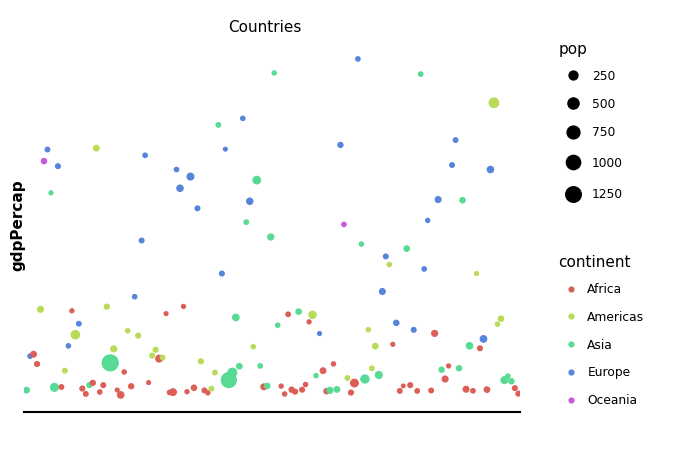

<ggplot: (8749219675585)>

In [76]:
(ggplot(popData[popData['year']>=2007], aes('country','gdpPercap',size='pop',color='continent'))
 + geom_point()
 + theme_void()
 + theme(axis_line_x=element_line(), axis_title_y=element_text(rotation=90))
 + ggtitle('Countries')
)

# mplfinance

In [ ]:
!pip install yfinance
!pip install mplfinance

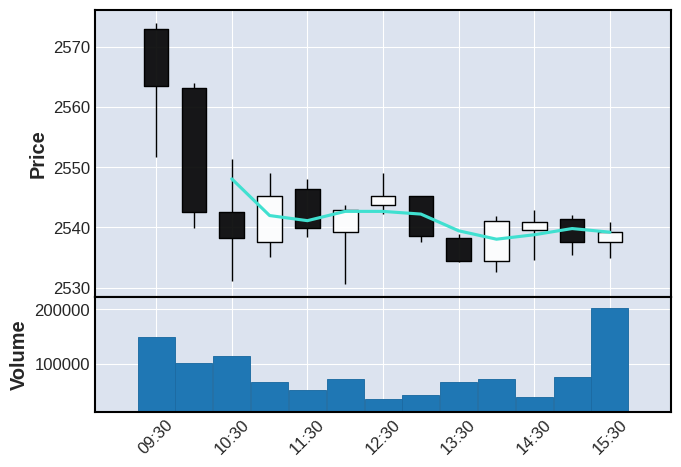

In [78]:
import yfinance as yp
import mplfinance as mpf
 
googl = yp.Ticker('GOOGL')
df = googl.history(period="1d", interval="30m")
 
mpf.plot(df,type='candle',mav=3,volume=True)